<a href="https://colab.research.google.com/github/Tor-Storli/COLAB_DEMOS/blob/master/DeoldefierImage.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **You can obtain your own copy of the original version of this Notebook here...**
#### https://github.com/jantic/DeOldify

### Make sure you read the information provided at Git, it provides a lot of information about this Notebook and the underlying techniques used to create the model

### You can learn more about what the Deep learning technique called Generative Adversarial Network (GAN) does by visiting this url...
####  https://en.wikipedia.org/wiki/Generative_adversarial_network

### Make sure you check out this video on YouTube for more details about the inner workings of the "DeOldefier" model.
#### https://www.youtube.com/watch?v=MdlT6IypKH8

#◢ DeOldify - Colorize your own photos!

####**Credits:**

Special thanks to:

Matt Robinson and María Benavente for pioneering the DeOldify image colab notebook.  

Dana Kelley for doing things, breaking stuff & having an opinion on everything.



---


#◢ Verify Correct Runtime Settings

**<font color='#FF000'> IMPORTANT </font>**

In the "Runtime" menu for the notebook window, select "Change runtime type." Ensure that the following are selected:
* Runtime Type = Python 3
* Hardware Accelerator = GPU 


In [0]:
import torch

if not torch.cuda.is_available():
    print('GPU not available.')

#◢ Git clone and install DeOldify

In [0]:
!git clone https://github.com/jantic/DeOldify.git DeOldify 

In [0]:
cd DeOldify

#◢ Setup

In [0]:
!pip install -r colab_requirements.txt

In [0]:
import fastai
from deoldify.visualize import *

torch.backends.cudnn.benchmark = True

#### **Note: What does the code snippet used above do?**... 
### `torch.backends.cudnn.benchmark = True`
#### This flag allows you to enable the inbuilt cudnn auto-tuner to find the best algorithm to use for your hardware

### Download DeOldefyModel and place it in the folder called "models"

In [0]:
!mkdir 'models'
!wget https://www.dropbox.com/s/zkehq1uwahhbc2o/ColorizeArtistic_gen.pth?dl=0 -O ./models/ColorizeArtistic_gen.pth

### Create an instance of the `get_image_colorizer`

In [0]:
colorizer = get_image_colorizer(artistic=True)

#◢ Instructions

### source_url
Type in a url to a direct link of an image.  Usually that means they'll end in .png, .jpg, etc. NOTE: If you want to use your own image, upload it first to a site like Imgur. 

### render_factor
The default value of 35 has been carefully chosen and should work -ok- for most scenarios (but probably won't be the -best-). This determines resolution at which the color portion of the image is rendered. Lower resolution will render faster, and colors also tend to look more vibrant. Older and lower quality images in particular will generally benefit by lowering the render factor. Higher render factors are often better for higher quality images, but the colors may get slightly washed out. 

#### How to Download a Copy
Simply right click on the displayed image and click "Save image as..."!

## Pro Tips

You can evaluate how well the image is rendered at each render_factor by using the code at the bottom (that cell under "See how well render_factor values perform on a frame here"). 

## Troubleshooting
If you get a 'CUDA out of memory' error, you probably have the render_factor too high.

In [0]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


## **You can get your own black and white images here...**
#### Just keep scrolling down when you get there -  to find images in black and white.
#### https://www.pexels.com/search/black%20and%20white%20old%20people/

#◢ Colorize!!

In [0]:
#@title Input Text here
variable_text = "Value3" #@param ["Value1", "Value2", "Value3"]
v = variable_text
print(v)

Value3


In [0]:
#@title Default title text


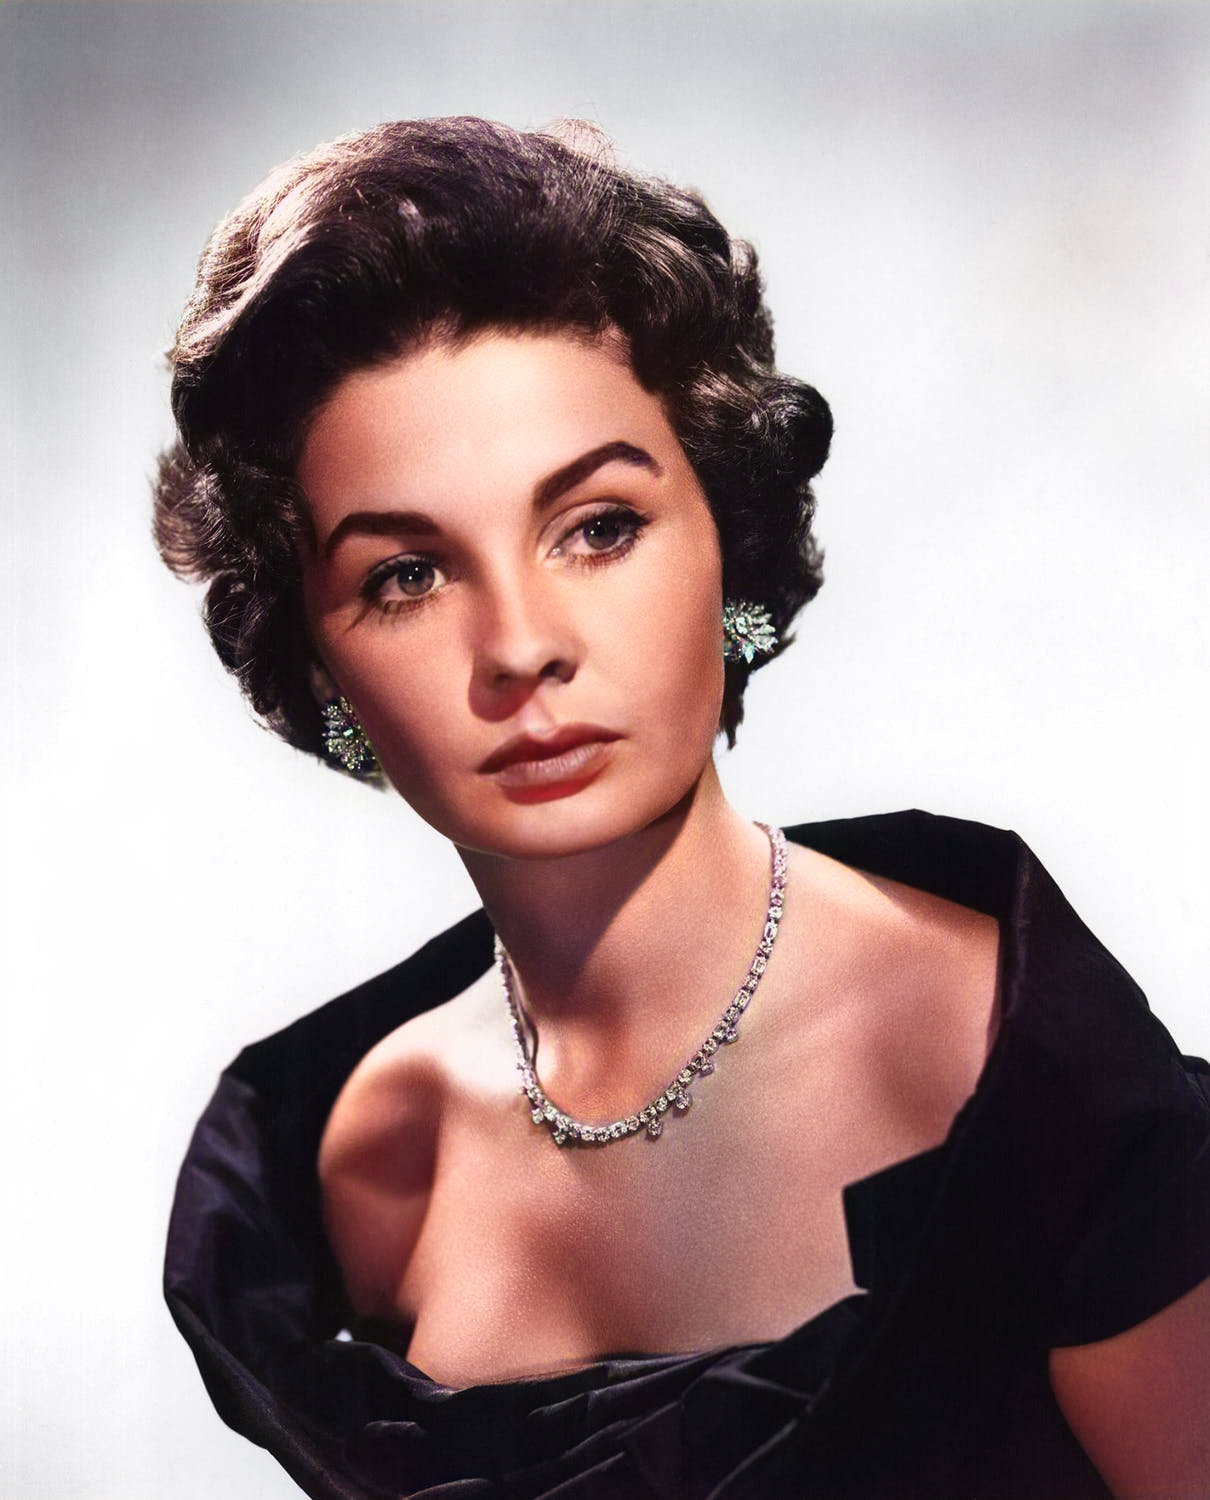

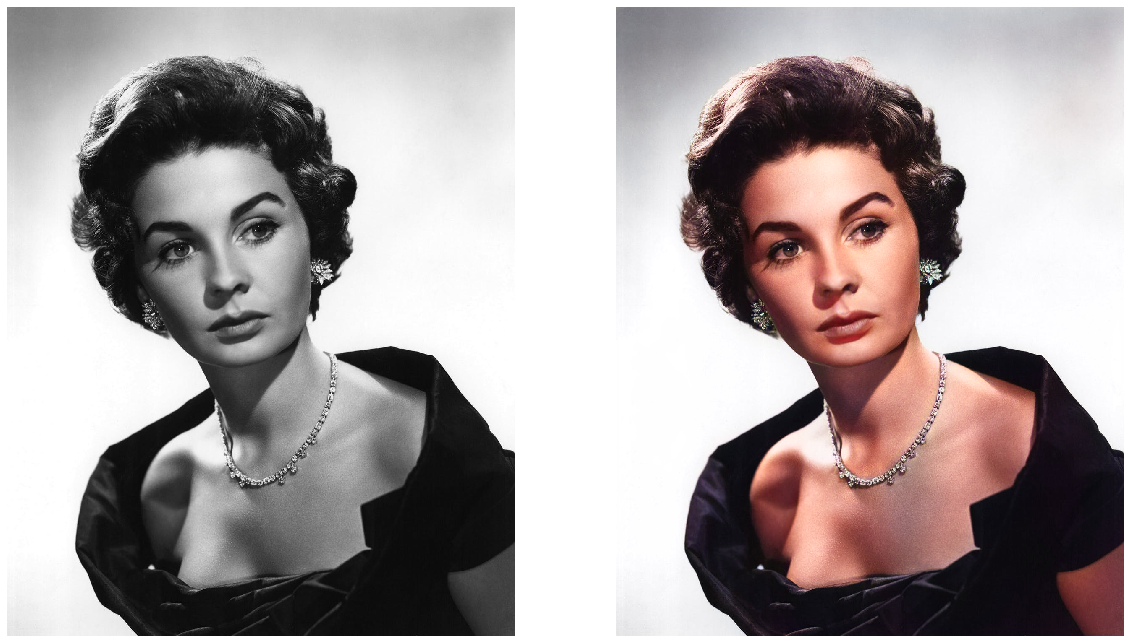

In [0]:
MyDrive_Images = "https://drive.google.com/uc?id=1Q3z6K1uDVF8ShiMwLpQe0Lr008OIErqf" #@param ["https://drive.google.com/uc?id=1qKX0vCiuETwmSbJV74boHIJDXsM6wKRy", "https://drive.google.com/uc?id=1TUgEXx-ryeQ6E2F9n7um3CqGsD5dj-6C", "https://drive.google.com/uc?id=16VnlYc2Icr-jG59c5v4NcpGIqgHGjCWp", "https://drive.google.com/uc?id=1vSprP67bEJG5-WANZ8JwFfh30YCAGlCb", "https://drive.google.com/uc?id=1HL5SnFVY-iyR54_0ryulgVQrDm3pCE8L", "https://drive.google.com/uc?id=1Vd8HRYhiEzutGvvH6pal8teiqTqAt0RT", "https://drive.google.com/uc?id=1x4gSlhUblyNt_74pSFDtTAY3oQMGQO4M", "https://drive.google.com/uc?id=1kZgVx-sZWI3gNPdkwWrDExKmezaKIQoJ", "https://drive.google.com/uc?id=1GOq-V0LwcoVMkN3x70LREML5sa9A9upx", "https://drive.google.com/uc?id=1AxnHrz3t5neXHOTQC86gJMInbrZg2359", "https://drive.google.com/uc?id=1BG5PbFcb60kISZLqvM_t4AjYNfTZcN5Q", "https://drive.google.com/uc?id=1nGNPQGf2Xoo-_xpqlwj3dQNimRYK_WO5", "https://drive.google.com/uc?id=1Q3z6K1uDVF8ShiMwLpQe0Lr008OIErqf"]
render_factor = 35  #@param {type: "slider", min: 7, max: 45}

if MyDrive_Images is not None and MyDrive_Images !='':
    image_path = colorizer.plot_transformed_image_from_url(url=MyDrive_Images, render_factor=render_factor, compare=True)
    show_image_in_notebook(image_path)
else:
    print('Provide an image url and try again.')

---
#⚙ Recommended image sources 
* [/r/TheWayWeWere](https://www.reddit.com/r/TheWayWeWere/)

## See how well render_factor values perform on the image here

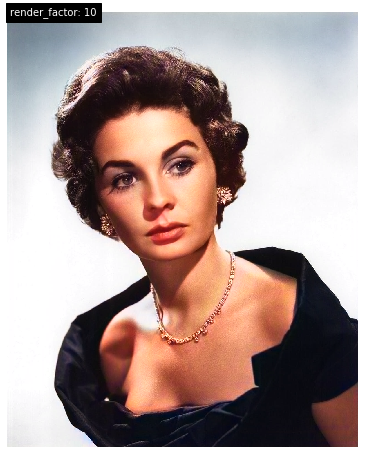

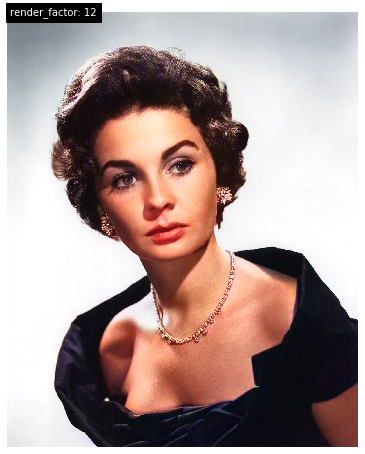

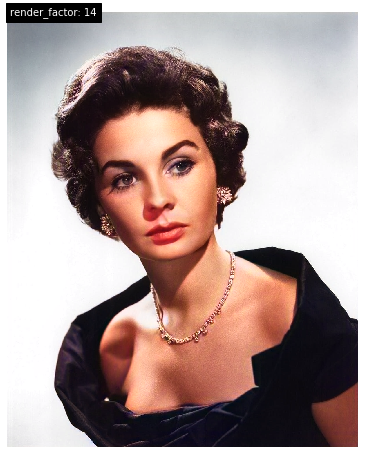

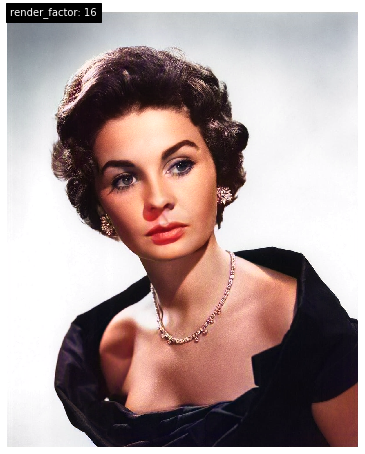

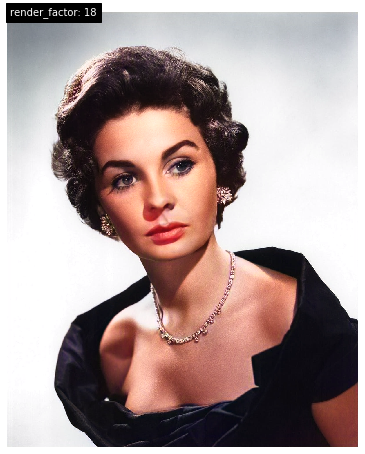

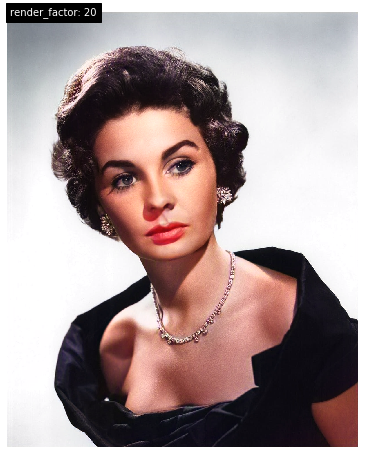

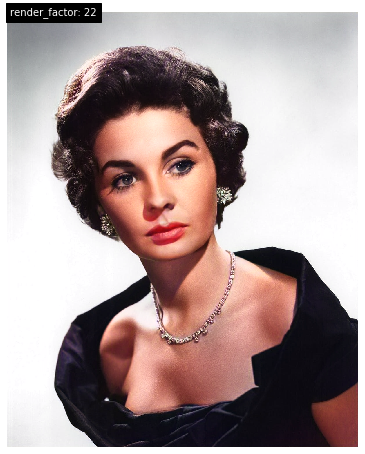

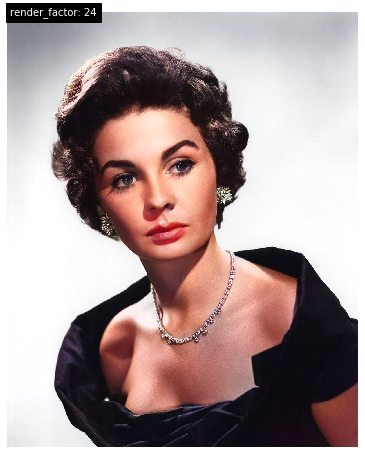

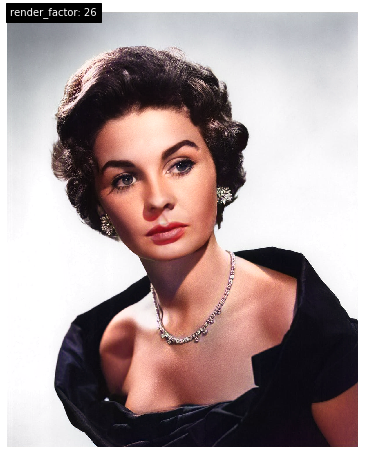

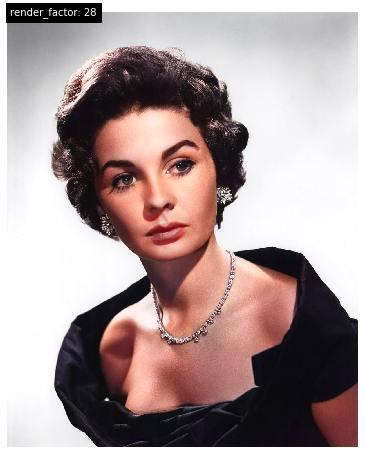

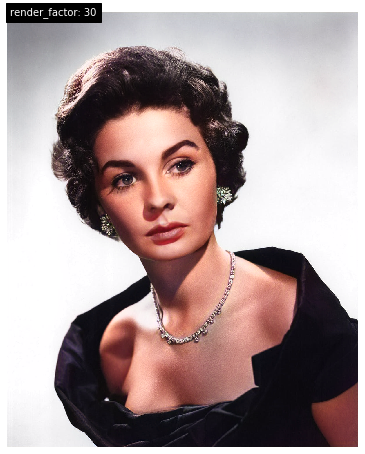

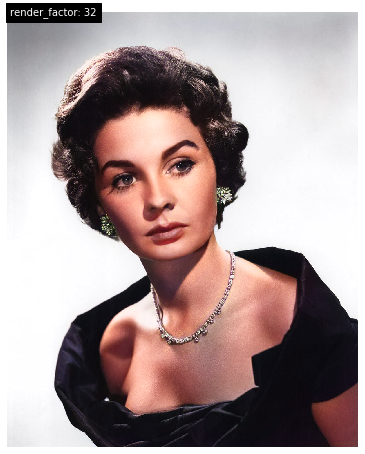

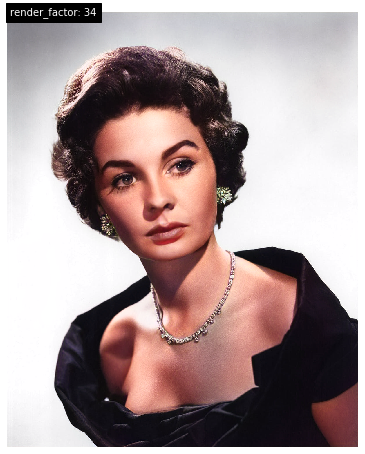

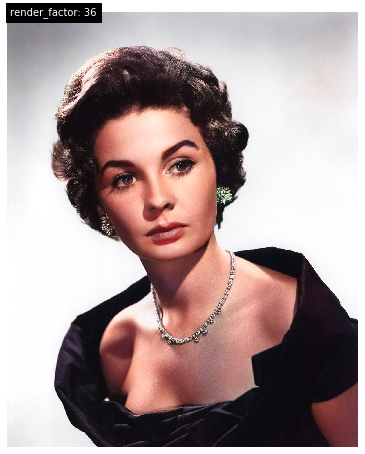

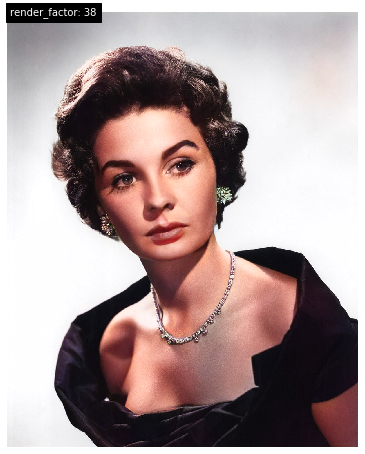

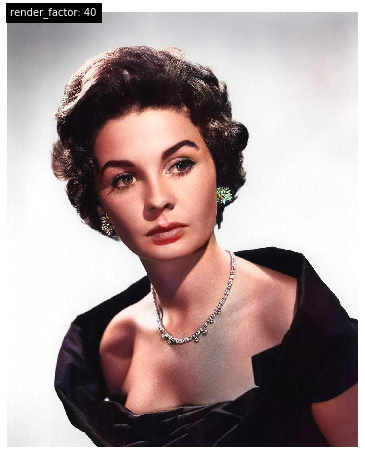

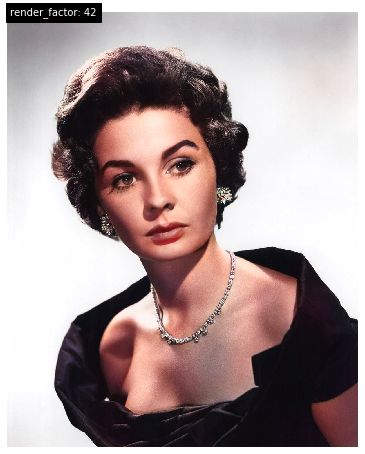

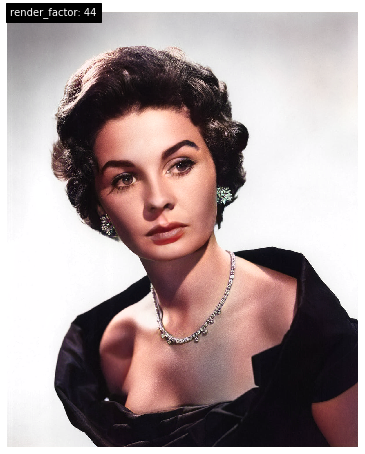

In [0]:
for i in range(10,46,2):
    colorizer.plot_transformed_image('test_images/image.png', render_factor=i, display_render_factor=True, figsize=(8,8))

###  END OF MODULE 